# RL Holiday Assignment 2211cs020308 AIML Zeta

## Questions

### Q1. Implement Upper-Confience bound algorithm (UCB) in Multi Arm Banding Problem to optimize player rewards in a basic game simulation with Python Program. The game scenario involves a player choosing between different "actions" (like doors, treasures, or paths), each with a hidden reward probability. The UCB algorithm must help the game adapt dynamically to maximize the player's experience.

Welcome to the Treasure Hunt Game!
There are hidden treasures behind different doors.
Your goal is to maximize rewards by choosing the best door.
The UCB Agent will guide you to make the best choices!
Enter the number of doors (e.g., 3, 5, 10): 5
Enter the number of game rounds (e.g., 10, 20, 50, 100): 10
Enter the exploration factor for UCB (e.g., 1.0, 2.0): 1.0

Round 1
Choose a door (0 to 4 ):
Your choice: 0
You chose door 0. Reward: ❌
Current Rewards: 0

Round 2
Choose a door (0 to 4 ):
Your choice: 4
You chose door 4. Reward: 💎
Current Rewards: 1

Round 3
Choose a door (0 to 4 ):
Your choice: 3
You chose door 3. Reward: ❌
Current Rewards: 1

Round 4
Choose a door (0 to 4 ):
Your choice: 2
You chose door 2. Reward: 💎
Current Rewards: 2

Round 5
Choose a door (0 to 4 ):
Your choice: 1
You chose door 1. Reward: ❌
Current Rewards: 2

Round 6
Choose a door (0 to 4 ):
Your choice: 4
You chose door 4. Reward: 💎
Current Rewards: 3

Round 7
Choose a door (0 to 4 ):
Your choice: 4
You chose

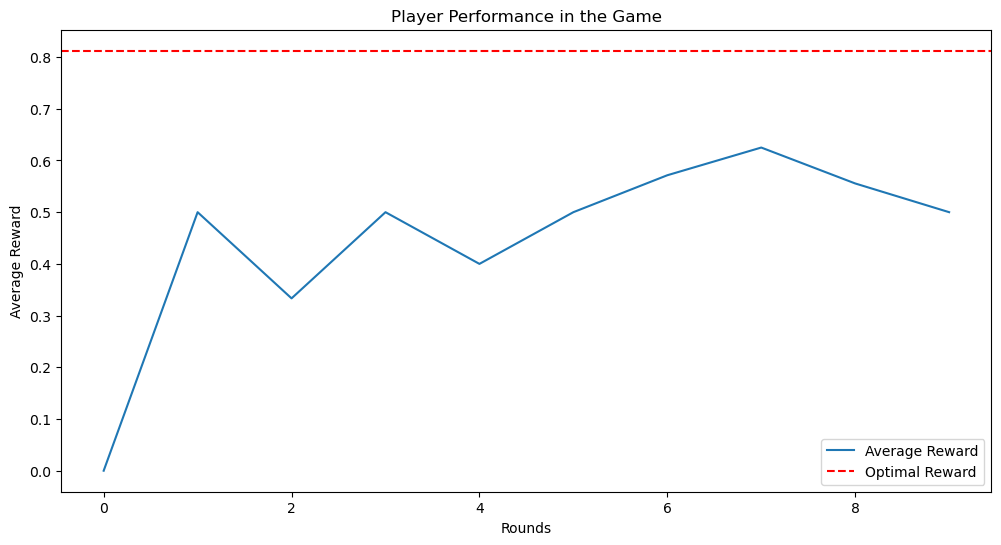

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the Game Environment
class GameEnvironment:
    def __init__(self, actions: int):
        """
        Initialize the game environment with hidden reward probabilities.
        
        Parameters:
        actions (int): Number of possible actions (e.g., doors, treasures, paths).
        """
        self.actions = actions
        self.hidden_rewards = np.random.uniform(0, 1, actions)  # Hidden reward probabilities
    
    def perform_action(self, action: int) -> int:
        """
        Simulate performing an action and receiving a reward.
        
        Parameters:
        action (int): Index of the chosen action.
        
        Returns:
        int: Reward obtained (1 for success, 0 for failure).
        """
        return 1 if np.random.rand() < self.hidden_rewards[action] else 0

# Define the UCB Agent
class UCBAgent:
    def __init__(self, actions: int, exploration_param: float):
        """
        Initialize the UCB agent.
        
        Parameters:
        actions (int): Number of possible actions.
        exploration_param (float): Exploration parameter for UCB.
        """
        self.actions = actions
        self.exploration_param = exploration_param
        self.action_counts = np.zeros(actions)  # Number of times each action is chosen
        self.action_rewards = np.zeros(actions)  # Total rewards for each action
    
    def select_action(self, current_step: int) -> int:
        """
        Select an action based on the UCB formula.
        
        Parameters:
        current_step (int): Current step in the game.
        
        Returns:
        int: Index of the selected action.
        """
        if current_step < self.actions:
            return current_step  # Ensure each action is tried at least once
        ucb_values = self.action_rewards / (self.action_counts + 1e-5) + \
                     self.exploration_param * np.sqrt(np.log(current_step + 1) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)
    
    def update(self, action: int, reward: int):
        """
        Update the agent's knowledge based on the reward received.
        
        Parameters:
        action (int): Index of the chosen action.
        reward (int): Reward obtained from the chosen action.
        """
        self.action_counts[action] += 1
        self.action_rewards[action] += (reward - self.action_rewards[action]) / self.action_counts[action]

# Interactive Game Function
def play_game():
    print("Welcome to the Treasure Hunt Game!")
    print("There are hidden treasures behind different doors.")
    print("Your goal is to maximize rewards by choosing the best door.")
    print("The UCB Agent will guide you to make the best choices!")
    
    num_actions = int(input("Enter the number of doors (e.g., 3, 5, 10): "))
    steps = int(input("Enter the number of game rounds (e.g., 10, 20, 50, 100): "))
    exploration_factor = float(input("Enter the exploration factor for UCB (e.g., 1.0, 2.0): "))
    
    # Initialize the game environment and agent
    environment = GameEnvironment(num_actions)
    agent = UCBAgent(num_actions, exploration_factor)
    
    player_rewards = []
    
    for step in range(steps):
        print("\nRound", step + 1)
        print("Choose a door (0 to", num_actions - 1, "):")
        
        try:
            player_choice = int(input("Your choice: "))
            if player_choice < 0 or player_choice >= num_actions:
                raise ValueError("Invalid door number.")
        except ValueError as e:
            print("Invalid input. The agent will choose for you!")
            player_choice = agent.select_action(step)
        
        reward = environment.perform_action(player_choice)
        agent.update(player_choice, reward)
        player_rewards.append(reward)
        
        print(f"You chose door {player_choice}. Reward: {'💎' if reward else '❌'}")
        print(f"Current Rewards: {sum(player_rewards)}")
        time.sleep(1)
    
    # Display the results
    print("\nGame Over! Here are the results:")
    print("Hidden Reward Probabilities:", environment.hidden_rewards)
    print("Total Rewards Collected:", sum(player_rewards))
    print("Action Counts:", agent.action_counts)
    
    # Plot the performance
    avg_rewards = np.cumsum(player_rewards) / (np.arange(1, steps + 1))
    plt.figure(figsize=(12, 6))
    plt.plot(avg_rewards, label="Average Reward")
    plt.axhline(y=max(environment.hidden_rewards), color="r", linestyle="--", label="Optimal Reward")
    plt.xlabel("Rounds")
    plt.ylabel("Average Reward")
    plt.title("Player Performance in the Game")
    plt.legend()
    plt.show()

# Run the Game
if __name__ == "__main__":
    play_game()


### Q2. Imagine an IoT-based smart home system that dynamically optimizes energy üsage across multiple devices (e.g., air conditioner, heater, and lights). Each device has a varying energy consumption efficiency based on real-time environmental factors like temperature or occupancy. Design an UCB algorithm is used to determine which device settings (e.g., energy modes) should be prioritized to maximize energy efficiency and implement the algorithm in Python


Do you want to add a new device? (yes/no): yes
Enter the name of the new device: Fan
Enter the number of modes for Fan: 2
Fan added with 2 modes.


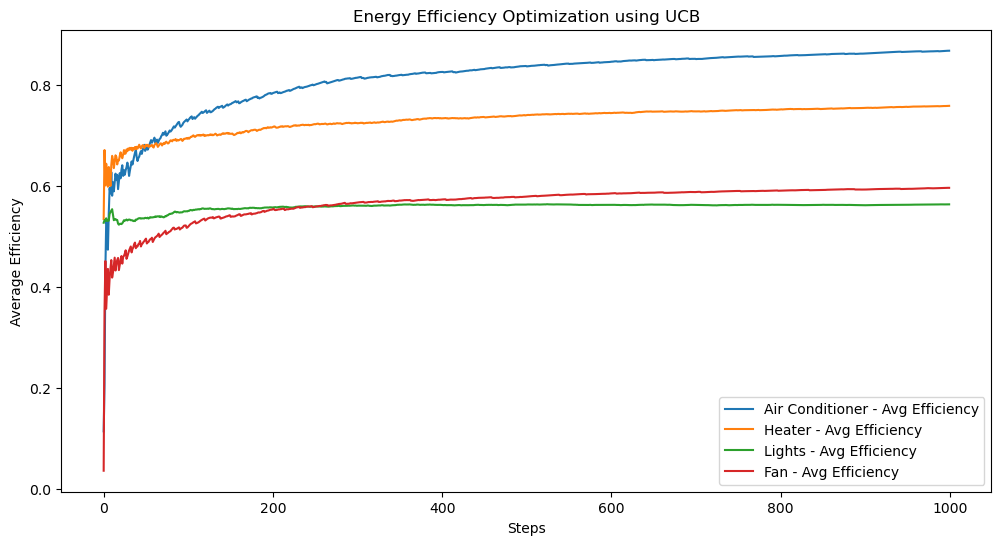


Prioritization Order (Device - Efficiency):
Air Conditioner - 0.87
Heater - 0.76
Fan - 0.60
Lights - 0.56


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class SmartHomeEnvironment:
    def __init__(self, devices, modes_per_device):
        self.devices = devices
        self.modes_per_device = modes_per_device
        self.efficiency_profiles = {
            device: np.random.rand(modes) for device, modes in modes_per_device.items()
        }

    def get_reward(self, device, mode, temperature, occupancy):
        base_efficiency = self.efficiency_profiles[device][mode]
        adjustment = -abs(temperature - 22) * 0.01 + occupancy * 0.02
        noise = np.random.normal(0, 0.05)
        return max(0, base_efficiency + adjustment + noise)

class UCBOptimizer:
    def __init__(self, devices, modes_per_device, exploration_param):
        self.devices = devices
        self.modes_per_device = modes_per_device
        self.exploration_param = exploration_param

        self.Q_values = {device: np.zeros(modes) for device, modes in modes_per_device.items()}
        self.action_counts = {device: np.zeros(modes) for device, modes in modes_per_device.items()}
        self.total_steps = 0

    def select_mode(self, device):
        modes = self.modes_per_device[device]
        for mode in range(modes):
            if self.action_counts[device][mode] == 0:
                return mode

        total_counts = np.sum(self.action_counts[device])
        ucb_values = self.Q_values[device] + self.exploration_param * np.sqrt(
            np.log(total_counts + 1) / (self.action_counts[device] + 1e-5)
        )
        return np.argmax(ucb_values)

    def update(self, device, mode, reward):
        self.action_counts[device][mode] += 1
        self.Q_values[device][mode] += (reward - self.Q_values[device][mode]) / self.action_counts[device][mode]

    def optimize(self, environment, steps, temperature_series, occupancy_series):
        rewards = {device: [] for device in self.devices}

        for step in range(steps):
            temperature = temperature_series[step]
            occupancy = occupancy_series[step]
            for device in self.devices:
                mode = self.select_mode(device)
                reward = environment.get_reward(device, mode, temperature, occupancy)
                self.update(device, mode, reward)
                rewards[device].append(reward)

        return rewards

def add_device(devices, modes_per_device):
    new_device = input("Enter the name of the new device: ")
    new_modes = int(input(f"Enter the number of modes for {new_device}: "))
    devices.append(new_device)
    modes_per_device[new_device] = new_modes
    print(f"{new_device} added with {new_modes} modes.")
    return devices, modes_per_device

# Main Simulation
if __name__ == "__main__":
    # Configuration
    devices = ["Air Conditioner", "Heater", "Lights"]
    modes_per_device = {"Air Conditioner": 3, "Heater": 3, "Lights": 2}
    
    # Ask user if they want to add a new device
    add_device_choice = input("Do you want to add a new device? (yes/no): ").lower()
    if add_device_choice == "yes":
        devices, modes_per_device = add_device(devices, modes_per_device)

    steps = 1000
    exploration_param = 2.0

    # Simulate environmental conditions
    temperature_series = np.random.randint(18, 30, steps)
    occupancy_series = np.random.randint(0, 5, steps)

    # Initialize environment and optimizer
    environment = SmartHomeEnvironment(devices, modes_per_device)
    optimizer = UCBOptimizer(devices, modes_per_device, exploration_param)

    # Run optimization
    rewards = optimizer.optimize(environment, steps, temperature_series, occupancy_series)

    # Plot results
    plt.figure(figsize=(12, 6))
    for device in devices:
        avg_rewards = np.cumsum(rewards[device]) / np.arange(1, steps + 1)
        plt.plot(avg_rewards, label=f"{device} - Avg Efficiency")
    plt.title("Energy Efficiency Optimization using UCB")
    plt.xlabel("Steps")
    plt.ylabel("Average Efficiency")
    plt.legend()
    plt.show()

    # Calculate final average efficiencies
    final_averages = {device: np.mean(rewards[device]) for device in devices}

    # Sort devices by efficiency
    prioritization_order = sorted(final_averages.items(), key=lambda x: x[1], reverse=True)

    # Print prioritization
    print("\nPrioritization Order (Device - Efficiency):")
    for device, efficiency in prioritization_order:
        print(f"{device} - {efficiency:.2f}")


### Q3. Develop a Chess-like game using PAC(Probably approximately correct) algorithm

In [5]:
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Define constants
BOARD_SIZE = 4
KING = "K"
PAWN = "P"
EMPTY = "."

# Helper function to initialize the board
def initialize_board():
    board = [[EMPTY for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
    board[0][0] = KING
    for col in range(1, 4):
        board[1][col] = PAWN
    board[3][3] = KING
    for col in range(0, 3):
        board[2][col] = PAWN
    return board

# Display board
def display_board(board):
    for row in board:
        print(" ".join(row))
    print()

# Generate valid moves
def get_valid_moves(board, piece, position):
    row, col = position
    moves = []
    if piece == KING:
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    elif piece == PAWN:
        directions = [(-1, 0)]
    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < BOARD_SIZE and 0 <= new_col < BOARD_SIZE and board[new_row][new_col] == EMPTY:
            moves.append((new_row, new_col))
    return moves

# Convert board to feature vector
def board_to_features(board, position):
    features = []
    for r, row in enumerate(board):
        for c, cell in enumerate(row):
            features.append(1 if cell == KING else 0.5 if cell == PAWN else 0)
    # Add positional features
    features.extend([position[0] / BOARD_SIZE, position[1] / BOARD_SIZE])
    return np.array(features)

# Generate dataset
def generate_dataset(num_samples=2000):
    X, y = [], []
    for _ in range(num_samples):
        board = initialize_board()
        piece = random.choice([KING, PAWN])
        positions = [(r, c) for r in range(BOARD_SIZE) for c in range(BOARD_SIZE) if board[r][c] == piece]
        if not positions:
            continue
        position = random.choice(positions)
        valid_moves = get_valid_moves(board, piece, position)
        if not valid_moves:
            continue
        move = random.choice(valid_moves)
        board_features = board_to_features(board, position)
        X.append(board_features)
        y.append((move[0] * BOARD_SIZE) + move[1])
    return np.array(X), np.array(y)

# Train PAC model with hyperparameter tuning
def train_pac_model(X_train, y_train):
    param_grid = {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
    model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    model.fit(X_train, y_train)
    print(f"Best Parameters: {model.best_params_}")
    return model.best_estimator_

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
# Predict the next move for a given board state and piece
def predict_next_move(model, board, piece, position):
    features = board_to_features(board, position).reshape(1, -1)
    predicted_move = model.predict(features)[0]
    row, col = divmod(predicted_move, BOARD_SIZE)
    return (row, col)


# Main function
if __name__ == "__main__":
    print("Generating dataset...")
    X, y = generate_dataset()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training PAC model...")
    pac_model = train_pac_model(X_train, y_train)

    print("Evaluating PAC model...")
    evaluate_model(pac_model, X_test, y_test)
    
    # Display an example game and make a prediction
    print("\nExample Game:")
    board = initialize_board()
    display_board(board)

    piece = KING  # Example: Predict for the King
    position = (0, 0)  # King's current position
    print(f"Predicting next move for {piece} at {position}...")
    predicted_move = predict_next_move(pac_model, board, piece, position)
    print(f"Predicted Move: {predicted_move}")


Generating dataset...
Training PAC model...
Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Evaluating PAC model...
Model Accuracy: 66.06%

Example Game:
K . . .
. P P P
P P P .
. . . K

Predicting next move for K at (0, 0)...
Predicted Move: (0, 1)
